In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import warnings
from matplotlib import pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_pickle('~/bdbd_datateam_research/data/recommend_table_v1.0.pkl')

In [9]:
subway_info = pd.read_csv('~/bdbd_datateam_research/data/kms_tables/지하철코드정보.csv', sep='|')
subway_matching = pd.read_csv('~/bdbd_datateam_research/data/kms_new/단지지하철매칭정보.csv', sep="|")

### 지하철 코드 정보 데이터 확인

In [10]:
subway_info.columns

Index(['Unnamed: 0', '지하철코드', '호선명', '역명', '사용여부', '등록일자', '수정일자', 'X좌표',
       'Y좌표', '환승가능여부', '법정동코드', '지역명', '간략호선명', '호선색상코드', '처리요청구분자', '요청일자',
       '처리일자'],
      dtype='object')

In [11]:
subway_info['호선명'].unique()

array(['서울-1호선', '서울-2호선', '서울-3호선', '서울-4호선', '서울-5호선', '서울-6호선',
       '서울-7호선', '서울-8호선', '서울-9호선', '수인분당선', '경의중앙선', '경춘선', '신분당선',
       '의정부경전철', '에버라인', '경강선', '우이신설경전철', '서해선', '김포골드라인', '부산-1호선',
       '부산-2호선', '부산-3호선', '부산-4호선', '부산-김해경전철', '동해선', '대구-1호선',
       '대구-2호선', '대구-3호선', '인천-1호선', '인천-2호선', '공항철도', '인천공항자기부상',
       '광주-1호선', '대전-1호선'], dtype=object)

In [12]:
subway_info['사용여부'].unique()

array(['Y'], dtype=object)

In [13]:
# 지하철 정보는 일단 맞는듯함...지도 그려봤을때
map = folium.Map(location=[37.541, 126.986], zoom_start=12)
for name, x, y in zip(subway_info['역명'], subway_info['X좌표'], subway_info['Y좌표']):
    folium.Marker(
        location=(y, x),
        tooltip=name
    ).add_to(map)

In [14]:
map

지하철 매칭정보 확인

In [15]:
subway_matching.columns

Index(['Unnamed: 0', '단지코드', '지하철코드', '이동수단', '이동시간', '등록일자', '수정일자',
       '처리요청구분자', '요청일자', '처리일자'],
      dtype='object')

In [16]:
subway_matching.groupby('단지코드').count().sort_values('지하철코드', ascending=False)

,Unnamed: 0,지하철코드,이동수단,이동시간,등록일자,수정일자,처리요청구분자,요청일자,처리일자
단지코드,,,,,,,,,
218909,12,12,12,12,12,12,12,12,0
26112,11,11,11,11,11,11,11,11,0
13863,11,11,11,11,11,11,11,11,0
26095,10,10,10,10,10,10,10,10,0
256,10,10,10,10,10,10,10,10,0
...,...,...,...,...,...,...,...,...,...
224409,1,1,1,1,1,1,1,1,0
221750,1,1,1,1,1,1,1,1,0
219268,1,1,1,1,1,1,1,1,0


In [17]:
# 한 아파트에 여러 지하철역 정보 있는 경우들 있으니까, 찾아보니까 종로 이런데 블록 모서리에 모두 지하철 있는데들이 있네...
df.loc[df['단지코드'] == 218909]

,단지코드,법정동번호,상세지번,도시형여부,신도시뉴타운명,지구명,브랜드명,단지구역명,단지구역명1,토탈총세대수,...,난방방식,단지조사레벨,단지X좌표,단지Y좌표,시도기본,구군,행정동,투기지역여부,투기과열지구여부,조정대상지역여부
38495,218909,11785,151-1번지 일원,Y,NaN,NaN,푸르지오,세운푸르지오헤리시티(도시형),NaN,293.0,...,개별난방,1,126.997103,37.56447,서울특별시,중구,광희동,Y,Y,Y


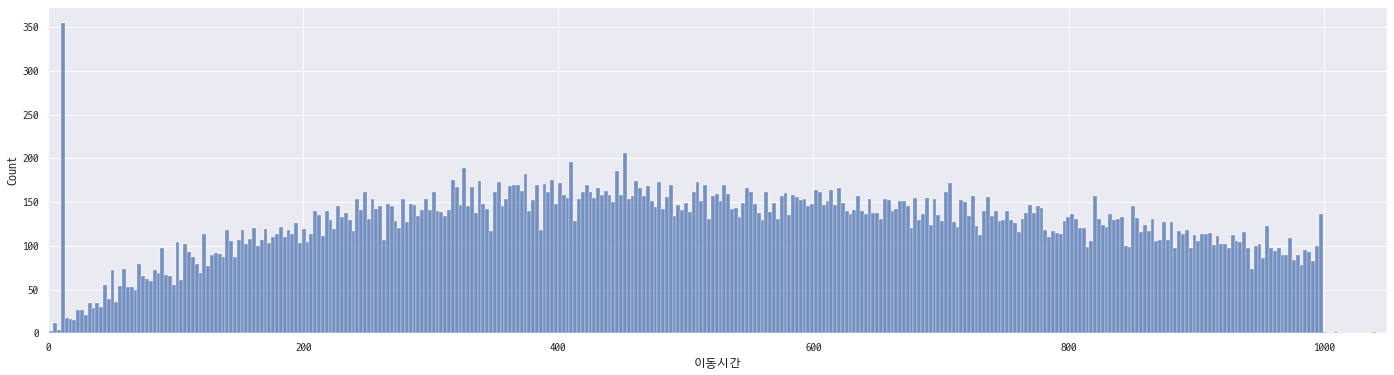

In [18]:
# 거리로 해서 그려보면 역시나 또 문제 있어. 저 밑에 갑자기 불쑥 솟구치는 부분 아마도 잘못입력된거지...
sns.set(rc={'figure.figsize': (24, 6), 'font.family': 'D2Coding'})
p = sns.histplot(subway_matching[subway_matching['이동수단'] == '거리']['이동시간'], bins=400)
p.set_xlim(0, 1050)
#plt.axvline(x=12, color='red')
plt.show()

In [19]:
# 위에꺼 잘라보면 5~10m 안에 너무 많이 들어있는거 알수 있음.
temp = subway_matching[subway_matching['이동수단'] == '거리']
temp.groupby(pd.cut(temp['이동시간'], np.arange(0, 1000, 5))).count()

,Unnamed: 0,단지코드,지하철코드,이동수단,이동시간,등록일자,수정일자,처리요청구분자,요청일자,처리일자
이동시간,,,,,,,,,,
"(0, 5]",14,14,14,14,14,14,14,14,14,0
"(5, 10]",351,351,351,351,351,351,351,351,351,0
"(10, 15]",26,26,26,26,26,26,26,26,26,0
"(15, 20]",28,28,28,28,28,28,28,28,28,0
"(20, 25]",43,43,43,43,43,43,43,43,43,0
...,...,...,...,...,...,...,...,...,...,...
"(970, 975]",166,166,166,166,166,166,166,166,166,0
"(975, 980]",146,146,146,146,146,146,146,146,146,0
"(980, 985]",144,144,144,144,144,144,144,144,144,0


In [20]:
# 범인은 바로 이동거리 10으로 들어간 부분... 
temp[temp['이동시간'] == 10]

,Unnamed: 0,단지코드,지하철코드,이동수단,이동시간,등록일자,수정일자,처리요청구분자,요청일자,처리일자
322,322,101,1707290,거리,10,2009-06-17 19:13:11,2018-12-04 10:42:11,Y,2021-12-30 00:33:42,NaN
402,402,133,1303360,거리,10,2012-07-10 15:29:48,2013-11-07 09:24:17,Y,2021-12-30 00:33:42,NaN
492,492,167,1303470,거리,10,2009-06-17 19:13:11,2012-07-10 09:48:15,Y,2021-12-30 00:33:42,NaN
520,520,178,1303480,거리,10,2009-06-17 19:13:11,2015-03-25 17:43:24,Y,2021-12-30 00:33:42,NaN
522,522,179,1303480,거리,10,2009-06-17 19:13:11,2011-12-07 13:45:41,Y,2021-12-30 00:33:42,NaN
...,...,...,...,...,...,...,...,...,...,...
72115,72115,55951,2101020,거리,10,2019-11-20 15:08:24,2019-11-20 15:48:03,Y,2021-12-30 00:33:42,NaN
72479,72479,56180,1G01070,거리,10,2019-12-10 10:11:18,2019-12-10 10:13:04,Y,2021-12-30 00:33:42,NaN
75934,75934,219519,1202270,거리,10,2020-07-16 13:00:31,2020-07-16 13:39:46,Y,2021-12-30 00:33:42,NaN
75946,75946,219529,1606200,거리,10,2020-07-16 13:02:22,2020-07-16 13:16:12,Y,2021-12-30 00:33:42,NaN


In [21]:
temp[temp['이동시간'] == 10].join(df, how='left', on='단지코드', lsuffix='left').to_csv("이동시간10.csv", encoding="utf-8-sig")

In [22]:
# 거의 대부분 한아파트당 도보랑 거리 정보 2개가 각각 row로 있는데, 둘중 하나만 있는애들도 있음 (31개)....
print(len(subway_matching.groupby('단지코드').filter(lambda g: len(g) == 1)))
subway_matching.groupby('단지코드').filter(lambda g: len(g) == 1)[:5]

31


,Unnamed: 0,단지코드,지하철코드,이동수단,이동시간,등록일자,수정일자,처리요청구분자,요청일자,처리일자
28701,28701,20699,41I1240,도보,10,2010-11-11 15:47:26,2010-11-11 15:47:26,Y,2021-12-30 00:33:42,NaN
36836,36836,28448,1707190,도보,5,2010-11-16 16:27:58,2010-11-16 16:27:58,Y,2021-12-30 00:33:42,NaN
51698,51698,40552,1505630,거리,318,2021-04-26 11:21:37,2021-04-26 11:21:37,Y,2021-12-30 00:33:42,NaN
54887,54887,42796,1505630,거리,197,2021-04-26 11:26:02,2021-04-26 11:26:02,Y,2021-12-30 00:33:42,NaN
55420,55420,43281,1505650,거리,548,2021-04-26 12:44:06,2021-04-26 12:44:06,Y,2021-12-30 00:33:42,NaN


## 이상치 있고 신뢰하기 어려우니까 그냥 전체 아파트랑 전체 지하철 역이랑 거리 계산해버리면

In [23]:
from haversine import haversine_vector 

In [24]:
apts = {}
for code, y, x in zip(df['단지코드'], df['단지Y좌표'], df['단지X좌표']):
    apts[code] = (y, x)

In [25]:
len(apts)

42726

In [26]:
sub = {}
for code, x, y in zip(subway_info['지하철코드'], subway_info['X좌표'], subway_info['Y좌표']):
    sub[code] = (y, x)

In [27]:
# 전체 지하철 좌표하고 전체 아파트 좌표로 매트릭스로 거리 계산
dist_vec = haversine_vector(list(sub.values()), list(apts.values()), comb=True, unit='m')

In [28]:
len(dist_vec[0])

1035

In [29]:
result = pd.DataFrame(dist_vec)

In [30]:
result.columns = list(sub.keys())
result['단지코드'] = list(apts.keys())
result.set_index('단지코드', inplace=True)

In [31]:
# 일단 500m 미만 있는 경우 아파트만으로 솎아
result500 = result[(result <= 500).any(1)]

In [32]:
# 여기에 해당되는 아파트만 벌써 12544개가 있음.
result500.shape

(12544, 1035)

In [33]:
result500.iloc[0][result500.iloc[0] <= 500]

1707300    470.572994
1AK2140    420.872652
Name: 1, dtype: float64

In [34]:
result500

,1101000,1101010,1101020,1101030,1101040,1101050,1101060,1101070,1101080,1101090,...,6101130,6101140,6101150,6101160,6101170,6101180,6101190,6101200,6101210,6101220
단지코드,,,,,,,,,,,,,,,,,,,,,
1,47776.729622,45416.938464,43947.226657,42545.283697,41508.258937,36075.810996,33336.797068,28353.428392,26696.225026,25471.213894,...,132595.235870,132351.106142,132553.238479,132417.869837,131896.343300,131481.569517,130565.045232,129769.873807,128712.234646,127753.150603
3,48345.207012,45974.739573,44512.442364,43110.854482,42073.756814,36667.624533,33921.053034,28908.494835,27245.087305,26030.506905,...,132392.970004,132141.778888,132334.638676,132187.819264,131657.454895,131235.306601,130317.316059,129523.721770,128469.751709,127508.112353
4,48741.209265,46382.978509,44912.356213,43510.446556,42473.495352,37037.674588,34300.057688,29321.148005,27664.887999,26438.802422,...,131621.382631,131376.732470,131578.226028,131442.134852,130920.100841,130504.938083,129588.338262,128793.243906,127735.791250,126776.572320
5,47733.937497,45375.356794,43904.926534,42503.007652,41466.038653,36031.109464,33293.078540,28313.226714,26656.860010,25430.893763,...,132603.019926,132359.601910,132562.666532,132428.452079,131907.819234,131493.791490,130577.420148,129782.094013,128724.090699,127765.269874
11,47942.004106,45582.818032,44112.746507,42710.814193,41673.816300,36240.078843,33501.577472,28519.952924,26863.141097,25637.673874,...,132418.953727,132174.916838,132377.178692,132241.982763,131720.599364,131305.951386,130389.453542,129594.255248,128536.553879,127577.514536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225951,33083.402191,30710.167385,29250.102311,27848.891484,26811.975229,21425.595785,18674.890104,13646.981493,11981.943516,10773.811338,...,147090.873306,146860.737025,147080.534436,146966.196923,146460.322184,146058.143721,145144.254357,144346.640026,143283.084264,142328.516940
225966,46332.306647,43944.127772,42501.272829,41104.063542,40069.643461,34739.248352,31987.180443,26936.384419,25270.269699,24087.631836,...,135138.678308,134878.287597,135058.857451,134896.710530,134354.424220,133922.221325,133002.355543,132211.067446,131162.316370,130197.328246
225967,55854.795636,53494.262958,52231.379380,50936.242104,49977.029840,45369.687223,42803.912042,38050.634862,36556.659904,35649.385034,...,135295.355946,134945.812506,135003.602048,134693.625820,134041.505655,133517.339848,132588.297226,131826.443462,130837.525040,129850.055999


In [35]:
# 500m 안에 지하철이 없는 경우도 많네?
result500.T[(result500.T <= 500).any(1)]

단지코드,1,3,4,5,11,12,13,14,15,17,...,225923,225935,225939,225942,225943,225951,225966,225967,225969,225979
1101010,45416.938464,45974.739573,46382.978509,45375.356794,45582.818032,46175.745498,46123.084660,45488.266676,46895.994904,46313.969532,...,73795.654019,351636.144213,42515.141663,353940.810760,353937.233623,30710.167385,43944.127772,53494.262958,357375.108036,47460.580655
1101020,43947.226657,44512.442364,44912.356213,43904.926534,44112.746507,44707.888569,44660.570502,44018.199750,45430.654719,44842.355363,...,72325.270021,350270.363885,41022.911677,352577.608544,352574.026370,29250.102311,42501.272829,52231.379380,355985.568755,46181.266706
1101030,42545.283697,43110.854482,43510.446556,42503.007652,42710.814193,43305.936477,43258.958401,42616.267232,44028.799500,43440.504458,...,70923.361081,349112.145165,39648.368641,351422.771849,351419.183074,27848.891484,41104.063542,50936.242104,354795.465262,44875.695365
1101040,41508.258937,42073.756814,42473.495352,41466.038653,41673.816300,42268.812490,42221.851534,41579.268879,42991.631720,42403.651314,...,69886.408104,348263.448311,38635.342979,350576.626670,350573.032913,26811.975229,40069.643461,49977.029840,353922.597803,43909.092616
1101050,36075.810996,36667.624533,37037.674588,36031.109464,36240.078843,36842.655111,36814.869484,36145.570225,37574.182095,36964.458434,...,64447.860634,343362.965927,33162.474636,345686.747186,345683.132672,21425.595785,34739.248352,45369.687223,348922.199097,39256.582651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101170,131896.343300,131657.454895,130920.100841,131907.819234,131720.599364,131235.584785,131505.812057,131812.693056,130643.486726,130946.093432,...,104481.219117,202450.641846,133862.864128,205133.469234,205129.098665,146460.322184,134354.424220,134041.505655,203027.963647,137745.953554
6101190,130565.045232,130317.316059,129588.338262,130577.420148,130389.453542,129900.943481,130165.619727,130481.691967,129304.846999,129615.651787,...,103096.820806,204046.490332,132590.896674,206728.767130,206724.397931,145144.254357,133002.355543,132588.297226,204633.064672,136318.368506
6101200,129769.873807,129523.721770,128793.243906,129782.094013,129594.255248,129106.354469,129372.034780,129686.469026,128510.974372,128820.329717,...,102312.689343,204550.582049,131787.551322,207230.951804,207226.587283,144346.640026,132211.067446,131826.443462,205184.374169,135547.030879
6101210,128712.234646,128469.751709,127735.791250,128724.090699,128536.553879,128050.082569,128318.087114,128628.709178,127456.368513,127762.341282,...,101279.753680,205126.216543,130709.080690,207803.666820,207799.309418,143283.084264,131162.316370,130837.525040,205831.650474,134539.743443


In [36]:
result.to_pickle('apt_to_subway.pkl')

In [37]:
rf = pd.read_pickle('apt_to_subway.pkl')